<a href="https://colab.research.google.com/github/mattreiso/mattreiso/blob/main/Predi%C3%A7%C3%A3o_de_venda_de_Cerveja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

In [2]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [3]:
cerveja = pd.read_csv('/content/drive/MyDrive/Colab/consumo_cerveja.csv')

In [12]:
cerveja.shape

(365, 7)

In [4]:
# entendendo o dados
cerveja.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    object 
 2   Temperatura Minima (C)       365 non-null    object 
 3   Temperatura Maxima (C)       365 non-null    object 
 4   Precipitacao (mm)            365 non-null    object 
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB


In [5]:
cerveja.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [6]:
cerveja.isnull().sum()

Data                           576
Temperatura Media (C)          576
Temperatura Minima (C)         576
Temperatura Maxima (C)         576
Precipitacao (mm)              576
Final de Semana                576
Consumo de cerveja (litros)    576
dtype: int64

In [7]:
#deletando apenas linhas nulas uma vez que sao linhas inteiras sem dados
cerveja.dropna(inplace=True)
cerveja.isnull().sum()

Data                           0
Temperatura Media (C)          0
Temperatura Minima (C)         0
Temperatura Maxima (C)         0
Precipitacao (mm)              0
Final de Semana                0
Consumo de cerveja (litros)    0
dtype: int64

In [8]:
cerveja.Data = pd.to_datetime(cerveja.Data)
var = ['Temperatura Media (C)', 'Temperatura Minima (C)', 'Temperatura Maxima (C)', 'Precipitacao (mm)']
cerveja.replace({',': '.'},inplace=True, regex=True)
cerveja.head()
#passando as virgulas para ponto 

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.3,23.9,32.5,0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21,28.3,0,0.0,28.900


In [9]:
cerveja[var] = cerveja[var].astype('float')
cerveja.describe()
#deixando em unidades contaveis e nao categoricas

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25.401367
std,3.180108,2.826185,4.317366,12.417844,0.452001,4.399143
min,12.900000,10.600000,14.500000,0.000000,0.000000,14.343000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22.008000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24.867000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28.631000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37.937000


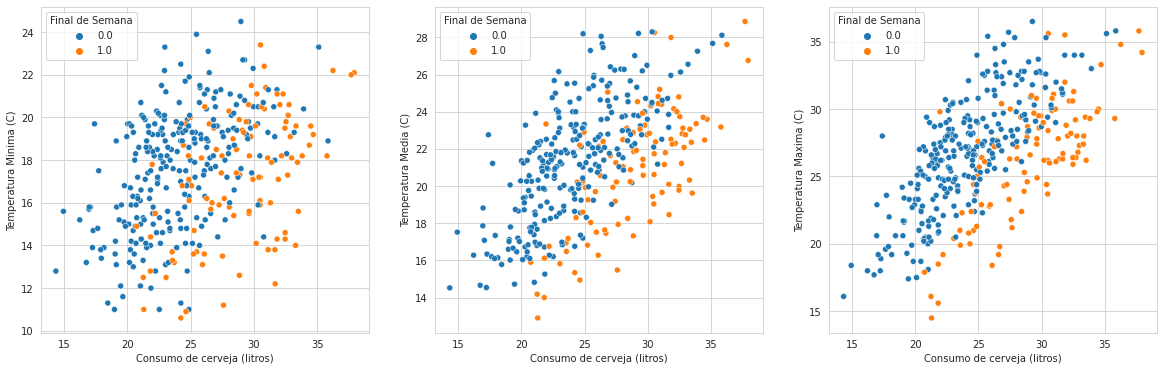

In [10]:
#quero vizualizar se ha uma correlação nitida entre o consumo de cerveja e as oscilações de temperatura
sns.set_style('whitegrid')
fig, ax = plt.subplots(1, 3, figsize=(20,6))

ax0 = sns.scatterplot('Consumo de cerveja (litros)','Temperatura Minima (C)', hue='Final de Semana', data=cerveja, ax=ax[0])
ax1 = sns.scatterplot('Consumo de cerveja (litros)','Temperatura Media (C)', hue='Final de Semana', data=cerveja, ax=ax[1])
ax2 = sns.scatterplot('Consumo de cerveja (litros)','Temperatura Maxima (C)', hue='Final de Semana', data=cerveja, ax=ax[2])
plt.show()

Maior consumo ocorre nitidamente nos finais de semana e quando a temperatura é MAIOR

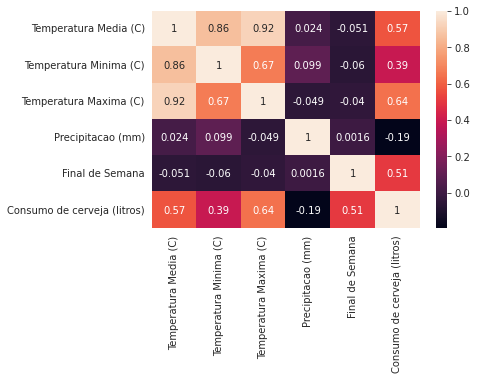

In [14]:
#observando correlações entre as variáveis (data nao é necessário entrar nas variáveis)

sns.heatmap(cerveja.iloc[:,1:].corr(), annot=True)

Maior correlação de vendas é com a temperatura maxima do dia

precipitação mostra uma correlaçao negativa porem bem pequena

In [18]:
carnaval = cerveja.loc[(cerveja['Data'] >= '2015-02-27') & (cerveja['Data'] <= '2015-03-02')]
carnaval

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
57,2015-02-27,24.64,20.4,31.4,0.6,0.0,26.241
58,2015-02-28,22.40,19.7,27.7,0.0,1.0,26.467
59,2015-03-01,21.26,18.2,26.3,3.0,1.0,27.475
60,2015-03-02,22.16,17.2,29.2,0.0,0.0,28.749


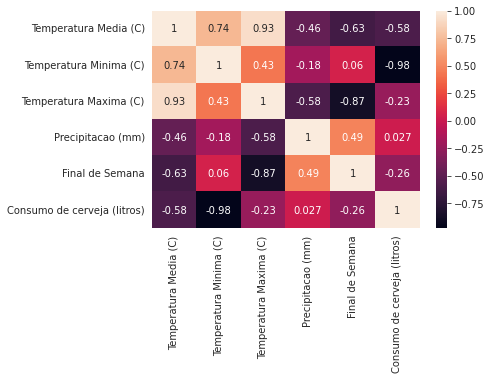

In [19]:
sns.heatmap(carnaval.iloc[:,1:].corr(), annot=True)
#vemos uma correlação completamente diferente nas datas de carnaval, onde aparentemente as pessoas consobem bem mais bebidas

In [22]:
ridge = Ridge()

Regressão linear

In [24]:
X = cerveja[['Temperatura Maxima (C)']]
y = cerveja[['Consumo de cerveja (litros)']]

ridge.fit(X, y)
ridge.predict(X)
ridge.score(X, y)

0.41302790098375974

Regressão linear multipla

In [25]:
X = cerveja[['Temperatura Maxima (C)', 'Final de Semana']]
y = cerveja[['Consumo de cerveja (litros)']]

ridge.fit(X, y)
y_hat = ridge.predict(X)
ridge.score(X, y)

0.6963051063219711

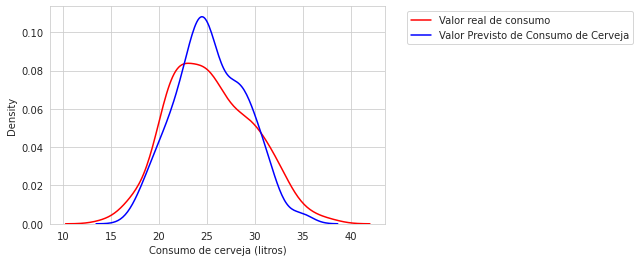

In [26]:
#modelo que melhor se aproximou da previsão foi o com multiplos preditores
ax1 = sns.distplot(cerveja['Consumo de cerveja (litros)'], hist=False, color='r', label='Valor real de consumo')
sns.distplot(y_hat, hist=False, ax=ax1, color='b', label='Valor Previsto de Consumo de Cerveja')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Comparação com regressão linear


In [28]:
lm = LinearRegression()

In [29]:
X = carnaval[['Temperatura Maxima (C)', 'Final de Semana']]
y = carnaval[['Consumo de cerveja (litros)']]

lm.fit(X, y)
y_hat = lm.predict(X)
lm.score(X, y)

0.9686722336478668

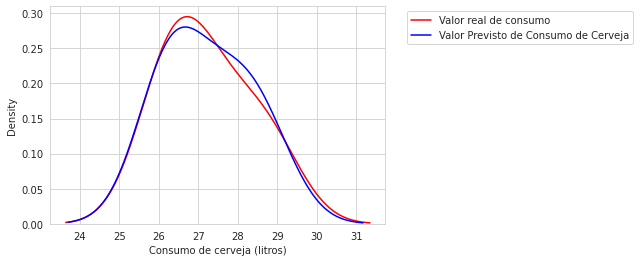

In [31]:
ax2 = sns.distplot(carnaval['Consumo de cerveja (litros)'], hist=False, color='r', label='Valor real de consumo')
sns.distplot(y_hat, hist=False, ax=ax2, color='b', label='Valor Previsto de Consumo de Cerveja')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
#com os dados do carnaval

In [32]:
#com os dados gerais
X = cerveja[['Temperatura Maxima (C)', 'Final de Semana']]
y = cerveja[['Consumo de cerveja (litros)']]

lm.fit(X, y)
y_hat = lm.predict(X)
lm.score(X, y)

0.6963552106338191

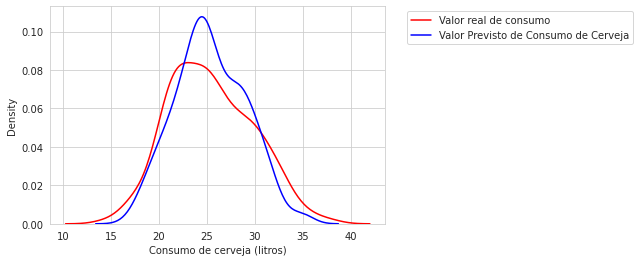

In [33]:
ax2 = sns.distplot(cerveja['Consumo de cerveja (litros)'], hist=False, color='r', label='Valor real de consumo')
sns.distplot(y_hat, hist=False, ax=ax2, color='b', label='Valor Previsto de Consumo de Cerveja')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [11]:
y = cerveja['Consumo de cerveja (litros)'].astype(float)
X = cerveja.iloc[:,1:6].astype(float)
#data nao é relevante para esse dado, lembrando de passar para numero